### Sreejith Kumara Pai
### AM.EN.U4CSE19153

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

### Reading The Data

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
rows,cols=df.shape
df.shape

(2938, 22)

#### Dataset consists of 2938 samples and 22 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Summarization

In [5]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [6]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Data Pre-Processing

#### Finding the missing values in each feature

In [7]:
null_vals = df.isna().sum().reset_index()
null_vals.columns = ['Factors', 'Missing Values']
null_vals["Missing %"] = round(null_vals['Missing Values']/rows*100, 2)
null_vals[ null_vals['Missing %'] > 0 ]

,Factors,Missing Values,Missing %
3,Life expectancy,10,0.34
4,Adult Mortality,10,0.34
6,Alcohol,194,6.60
8,Hepatitis B,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


#### Rename each fature into appropriate one

In [8]:
df.rename(columns={'Life expectancy ': 'Life Expectancy',
                   'infant deaths': 'Infant Deaths',
                   'percentage expenditure': 'Percentage Expenditure',
                   'Measles ': 'Measles',
                   ' BMI ': 'BMI',
                   'under-five deaths ': 'Under Five Deaths',
                   'Diphtheria ': 'Diphtheria Vaccination %',
                   ' HIV/AIDS': 'HIV/AIDS',
                   ' thinness  1-19 years': 'Thinness 10-19 years',
                   ' thinness 5-9 years': 'Thinness 5-9 years',
                   'Income composition of resources': 'Resources Income Composition',
                   'Total expenditure': 'Total Expenditure',
                   'Polio': 'Pol3 Vaccination %',
                   'Hepatitis B': 'HepB Vaccination %', 
                   'Alcohol': 'Alcohol Intake(L)'
                  },inplace=True)

list(df.columns)

['Country',
 'Year',
 'Status',
 'Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol Intake(L)',
 'Percentage Expenditure',
 'HepB Vaccination %',
 'Measles',
 'BMI',
 'Under Five Deaths',
 'Pol3 Vaccination %',
 'Total Expenditure',
 'Diphtheria Vaccination %',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 10-19 years',
 'Thinness 5-9 years',
 'Resources Income Composition',
 'Schooling']

In [9]:
print("Missing Values in each features:\n", df.isnull().sum())

Missing Values in each features:
 Country                           0
Year                              0
Status                            0
Life Expectancy                  10
Adult Mortality                  10
Infant Deaths                     0
Alcohol Intake(L)               194
Percentage Expenditure            0
HepB Vaccination %              553
Measles                           0
BMI                              34
Under Five Deaths                 0
Pol3 Vaccination %               19
Total Expenditure               226
Diphtheria Vaccination %         19
HIV/AIDS                          0
GDP                             448
Population                      652
Thinness 10-19 years             34
Thinness 5-9 years               34
Resources Income Composition    167
Schooling                       163
dtype: int64


#### Filling all NaN value with mean value

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
print("Post Missing Values Qty:\n", df.isnull().sum())

Post Missing Values Qty:
 Country                         0
Year                            0
Status                          0
Life Expectancy                 0
Adult Mortality                 0
Infant Deaths                   0
Alcohol Intake(L)               0
Percentage Expenditure          0
HepB Vaccination %              0
Measles                         0
BMI                             0
Under Five Deaths               0
Pol3 Vaccination %              0
Total Expenditure               0
Diphtheria Vaccination %        0
HIV/AIDS                        0
GDP                             0
Population                      0
Thinness 10-19 years            0
Thinness 5-9 years              0
Resources Income Composition    0
Schooling                       0
dtype: int64


In [12]:
df = df.drop(columns = ['Adult Mortality', 'Infant Deaths','Under Five Deaths','Percentage Expenditure',
                        'Measles','Thinness 5-9 years'])

In [13]:
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life Expectancy',
 'Alcohol Intake(L)',
 'HepB Vaccination %',
 'BMI',
 'Pol3 Vaccination %',
 'Total Expenditure',
 'Diphtheria Vaccination %',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 10-19 years',
 'Resources Income Composition',
 'Schooling']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Life Expectancy               2938 non-null   float64
 4   Alcohol Intake(L)             2938 non-null   float64
 5   HepB Vaccination %            2938 non-null   float64
 6   BMI                           2938 non-null   float64
 7   Pol3 Vaccination %            2938 non-null   float64
 8   Total Expenditure             2938 non-null   float64
 9   Diphtheria Vaccination %      2938 non-null   float64
 10  HIV/AIDS                      2938 non-null   float64
 11  GDP                           2938 non-null   float64
 12  Population                    2938 non-null   float64
 13  Thi

### Break-Down Of Features¶

In [15]:
df['Country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object

In [16]:
df['Year']

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

In [17]:
df['Life Expectancy']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life Expectancy, Length: 2938, dtype: float64

In [18]:
df['Alcohol Intake(L)']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
2933    4.36
2934    4.06
2935    4.43
2936    1.72
2937    1.68
Name: Alcohol Intake(L), Length: 2938, dtype: float64

In [19]:
df['HepB Vaccination %']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    68.0
2934     7.0
2935    73.0
2936    76.0
2937    79.0
Name: HepB Vaccination %, Length: 2938, dtype: float64

In [20]:
df['BMI']

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name: BMI, Length: 2938, dtype: float64

In [21]:
df['Pol3 Vaccination %']

0        6.0
1       58.0
2       62.0
3       67.0
4       68.0
        ... 
2933    67.0
2934     7.0
2935    73.0
2936    76.0
2937    78.0
Name: Pol3 Vaccination %, Length: 2938, dtype: float64

In [22]:
df['Total Expenditure']

0       8.16
1       8.18
2       8.13
3       8.52
4       7.87
        ... 
2933    7.13
2934    6.52
2935    6.53
2936    6.16
2937    7.10
Name: Total Expenditure, Length: 2938, dtype: float64

In [23]:
df['Diphtheria Vaccination %']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    65.0
2934    68.0
2935    71.0
2936    75.0
2937    78.0
Name: Diphtheria Vaccination %, Length: 2938, dtype: float64

In [24]:
df['HIV/AIDS']

0        0.1
1        0.1
2        0.1
3        0.1
4        0.1
        ... 
2933    33.6
2934    36.7
2935    39.8
2936    42.1
2937    43.5
Name: HIV/AIDS, Length: 2938, dtype: float64

In [25]:
df['GDP']

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2938, dtype: float64

In [26]:
df['Population']

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2938, dtype: float64

In [27]:
df['Thinness 10-19 years']

0       17.2
1       17.5
2       17.7
3       17.9
4       18.2
        ... 
2933     9.4
2934     9.8
2935     1.2
2936     1.6
2937    11.0
Name: Thinness 10-19 years, Length: 2938, dtype: float64

In [28]:
df['Resources Income Composition']

0       0.479
1       0.476
2       0.470
3       0.463
4       0.454
        ...  
2933    0.407
2934    0.418
2935    0.427
2936    0.427
2937    0.434
Name: Resources Income Composition, Length: 2938, dtype: float64

In [29]:
df['Schooling']

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64

#### End of Bread down of features

## Data Visualization

In [30]:
India =df[df['Country'] == 'India']
India

,Country,Year,Status,Life Expectancy,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling
1186,India,2015,Developing,68.3,4.602861,87.000000,18.7,86.0,5.93819,87.0,0.2,1613.188780,1.395398e+06,26.7,0.615,11.6
1187,India,2014,Developing,68.0,3.070000,79.000000,18.1,84.0,4.69000,85.0,0.2,1573.118890,1.293859e+09,26.8,0.607,11.6
1188,India,2013,Developing,67.6,3.110000,7.000000,17.5,82.0,4.53000,83.0,0.2,1452.195373,1.278562e+08,26.8,0.599,11.5
1189,India,2012,Developing,67.3,3.100000,73.000000,17.0,79.0,4.39000,82.0,0.2,1446.985410,1.263659e+08,26.9,0.590,11.3
1190,India,2011,Developing,66.8,3.000000,44.000000,16.4,79.0,4.33000,82.0,0.2,1461.671957,1.247236e+08,26.9,0.580,10.8
1191,India,2010,Developing,66.4,2.770000,38.000000,15.9,76.0,4.28000,79.0,0.2,1345.771530,1.239869e+07,27.0,0.569,10.4
1192,India,2009,Developing,66.0,2.500000,37.000000,15.4,73.0,4.38000,74.0,0.2,19.317765,1.214271e+08,27.0,0.563,10.5
1193,India,2008,Developing,65.5,1.930000,29.000000,14.9,69.0,4.34000,7.0,0.3,991.484634,1.197147e+08,27.0,0.556,10.2
1194,India,2007,Developing,65.2,1.590000,6.000000,14.4,67.0,4.23000,64.0,0.3,118.166373,1.179681e+09,27.1,0.546,9.9
1195,India,2006,Developing,64.8,1.370000,6.000000,13.9,66.0,4.25000,65.0,0.3,792.259698,1.161978e+09,27.1,0.536,9.7


In [31]:
Australia =df[df['Country'] == 'Australia']
Australia

,Country,Year,Status,Life Expectancy,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling
112,Australia,2015,Developed,82.8,4.602861,93.000000,66.6,93.0,5.93819,93.0,0.1,56554.38760,23789338.0,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,9.710000,91.000000,66.1,92.0,9.42000,92.0,0.1,62214.69120,2346694.0,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,9.870000,91.000000,65.5,91.0,9.36000,91.0,0.1,67792.33860,23117353.0,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,10.030000,91.000000,65.0,92.0,9.36000,92.0,0.1,67677.63477,22728254.0,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,10.300000,92.000000,64.4,92.0,9.20000,92.0,0.1,62245.12900,223424.0,0.6,0.927,19.8
117,Australia,2010,Developed,81.9,10.520000,92.000000,63.9,92.0,9.20000,92.0,0.1,51874.84800,223175.0,0.7,0.927,19.5
118,Australia,2009,Developed,81.7,10.620000,94.000000,63.4,92.0,9.50000,92.0,0.1,42742.99898,216917.0,0.7,0.925,19.1
119,Australia,2008,Developed,81.3,10.760000,94.000000,62.9,92.0,8.78000,92.0,0.1,49664.68540,212492.0,0.7,0.921,19.1
120,Australia,2007,Developed,81.3,10.560000,94.000000,62.5,92.0,8.53000,92.0,0.1,4991.98289,28276.0,0.7,0.918,19.0
121,Australia,2006,Developed,81.2,10.310000,95.000000,62.0,92.0,8.49000,92.0,0.1,36118.28381,26979.0,0.7,0.915,20.3


### Graphs related to the dataset

#### Life Expetancy of India year by year

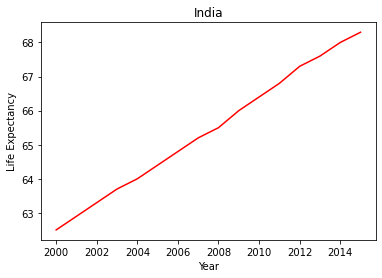

In [32]:
plt.plot(India['Year'], India['Life Expectancy'], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("India")
plt.show()

#### Life Expetancy of Australia year by year

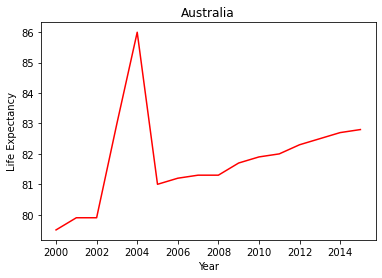

In [33]:
plt.plot(Australia['Year'], Australia['Life Expectancy'], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("Australia")
plt.show()

In [34]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

#### Box Plot of Devloped and Developing Countries

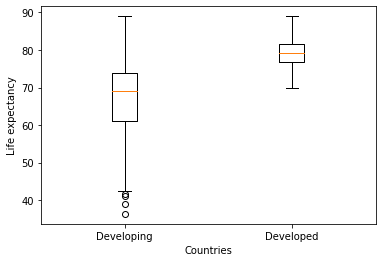

In [35]:
plt.boxplot([df[df['Status']=='Developing']['Life Expectancy'], df[df['Status']=='Developed']['Life Expectancy']], labels=['Developing','Developed'])
plt.ylabel('Life expectancy')
plt.xlabel('Countries')
plt.show()

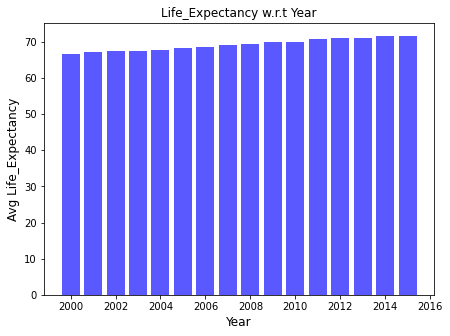

In [38]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index, df.groupby('Year')['Life Expectancy'].mean(),color='blue',
        alpha=0.65)

plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")

plt.show()

### Scatterplot

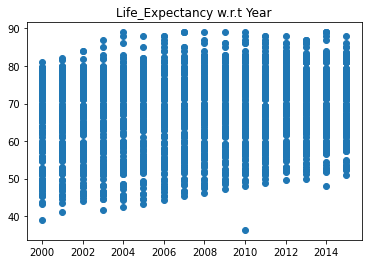

In [39]:
plt.scatter(x='Year', y='Life Expectancy', data=df)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

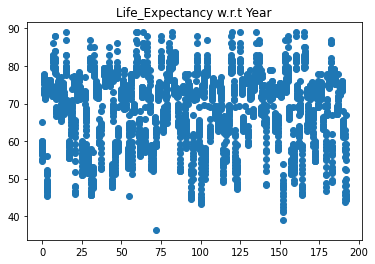

In [42]:
plt.scatter(x='labels', y='Life Expectancy', data=df)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

### Label Encoding

The dataset consists of several countries which are encoded in string format. These are replaced with corresponding label values (1,2,3…etc to n) using the Label Encoding method.

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df.loc[:, 'Country'])

In [43]:
df

,Country,Year,Status,Life Expectancy,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
0,Afghanistan,2015,Developing,65.0,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,0
1,Afghanistan,2014,Developing,59.9,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,59.9,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,59.5,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,0
4,Afghanistan,2011,Developing,59.2,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,192
2934,Zimbabwe,2003,Developing,44.5,4.06,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,192
2935,Zimbabwe,2002,Developing,44.8,4.43,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,192
2936,Zimbabwe,2001,Developing,45.3,1.72,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,192


In [44]:
df[df['Country'] == 'India']

,Country,Year,Status,Life Expectancy,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
1186,India,2015,Developing,68.3,4.602861,87.000000,18.7,86.0,5.93819,87.0,0.2,1613.188780,1.395398e+06,26.7,0.615,11.6,76
1187,India,2014,Developing,68.0,3.070000,79.000000,18.1,84.0,4.69000,85.0,0.2,1573.118890,1.293859e+09,26.8,0.607,11.6,76
1188,India,2013,Developing,67.6,3.110000,7.000000,17.5,82.0,4.53000,83.0,0.2,1452.195373,1.278562e+08,26.8,0.599,11.5,76
1189,India,2012,Developing,67.3,3.100000,73.000000,17.0,79.0,4.39000,82.0,0.2,1446.985410,1.263659e+08,26.9,0.590,11.3,76
1190,India,2011,Developing,66.8,3.000000,44.000000,16.4,79.0,4.33000,82.0,0.2,1461.671957,1.247236e+08,26.9,0.580,10.8,76
1191,India,2010,Developing,66.4,2.770000,38.000000,15.9,76.0,4.28000,79.0,0.2,1345.771530,1.239869e+07,27.0,0.569,10.4,76
1192,India,2009,Developing,66.0,2.500000,37.000000,15.4,73.0,4.38000,74.0,0.2,19.317765,1.214271e+08,27.0,0.563,10.5,76
1193,India,2008,Developing,65.5,1.930000,29.000000,14.9,69.0,4.34000,7.0,0.3,991.484634,1.197147e+08,27.0,0.556,10.2,76
1194,India,2007,Developing,65.2,1.590000,6.000000,14.4,67.0,4.23000,64.0,0.3,118.166373,1.179681e+09,27.1,0.546,9.9,76
1195,India,2006,Developing,64.8,1.370000,6.000000,13.9,66.0,4.25000,65.0,0.3,792.259698,1.161978e+09,27.1,0.536,9.7,76


### Dropping X & Y Values

In [45]:
y = df['Life Expectancy']
df = df.drop(labels='Life Expectancy', axis=1)
df

,Country,Year,Status,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
0,Afghanistan,2015,Developing,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,0
1,Afghanistan,2014,Developing,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,0
4,Afghanistan,2011,Developing,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,4.36,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,192
2934,Zimbabwe,2003,Developing,4.06,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,192
2935,Zimbabwe,2002,Developing,4.43,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,192
2936,Zimbabwe,2001,Developing,1.72,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,192


In [46]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life Expectancy, Length: 2938, dtype: float64

In [47]:
y = y.to_numpy(dtype='float64')
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [48]:
X = df
X

,Country,Year,Status,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
0,Afghanistan,2015,Developing,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,0
1,Afghanistan,2014,Developing,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,0
4,Afghanistan,2011,Developing,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,4.36,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,192
2934,Zimbabwe,2003,Developing,4.06,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,192
2935,Zimbabwe,2002,Developing,4.43,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,192
2936,Zimbabwe,2001,Developing,1.72,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,192


In [49]:
X = X.drop(labels=['Country','Status'],axis=1)
X

,Year,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
0,2015,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,0
1,2014,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,0
2,2013,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,0
3,2012,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,0
4,2011,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,4.36,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,192
2934,2003,4.06,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,192
2935,2002,4.43,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,192
2936,2001,1.72,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,192


In [50]:
X

,Year,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
0,2015,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,0
1,2014,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,0
2,2013,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,0
3,2012,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,0
4,2011,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,4.36,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,192
2934,2003,4.06,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,192
2935,2002,4.43,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,192
2936,2001,1.72,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,192


### Splitting dataset into Train - Test

Split data of X & Y into Train and Test dataset.  
We use these data to train and test the model.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [52]:
X_train

,Year,Alcohol Intake(L),HepB Vaccination %,BMI,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Resources Income Composition,Schooling,labels
456,2007,5.28,96.000000,25.5,98.0,4.30,98.0,0.6,3112.285712,4.864380e+05,8.1,0.602,11.9,27
462,2001,3.81,80.940461,22.1,91.0,5.19,9.0,0.8,1268.884564,4.437160e+05,9.4,0.562,11.0,27
2172,2011,10.43,99.000000,44.5,99.0,7.58,99.0,0.1,7483.158469,1.275338e+07,4.3,0.733,12.9,143
2667,2013,1.29,98.000000,59.3,98.0,7.26,98.0,0.1,4199.472530,1.114558e+06,6.4,0.720,14.7,175
381,2002,0.13,99.000000,28.0,99.0,3.40,94.0,0.1,16846.219800,1.275338e+07,6.7,0.820,13.3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2011,6.91,82.000000,68.0,96.0,9.60,96.0,0.1,22821.847000,4.162680e+05,0.8,0.826,14.8,104
1095,2010,3.21,83.000000,23.1,82.0,6.70,83.0,5.9,543.957418,1.555880e+05,8.0,0.405,8.9,70
1130,2007,6.08,80.940461,4.7,62.0,5.56,63.0,2.7,615.819819,9.556889e+06,4.2,0.458,8.4,72
1294,2003,9.30,95.000000,57.0,97.0,8.17,96.0,0.1,27387.225800,5.731323e+06,0.5,0.841,15.4,82


In [53]:
y_train

array([72.3, 73. , 74.6, ..., 61.8, 79.9, 59.4])

### Standardization

Some features within the dataset have vastly varying values.  
Therefore those values had to be standardized using the StandardScale method.

In [54]:
from sklearn import preprocessing, linear_model, model_selection, metrics

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train

array([[-0.11655742,  0.17610231,  0.66566362, ..., -0.14324741,
        -0.03879636, -1.22247073],
       [-1.41779229, -0.20121344, -0.00731702, ..., -0.34160078,
        -0.31547383, -1.22247073],
       [ 0.75093249,  1.49799083,  0.79972761, ...,  0.50635989,
         0.26862305,  0.84188936],
       ...,
       [-0.11655742,  0.38144422, -0.00731702, ..., -0.85731956,
        -1.1147643 , -0.42164138],
       [-0.98404733,  1.20794539,  0.62097562, ...,  1.041914  ,
         1.03717157, -0.24367931],
       [-0.55030238, -0.90450947,  0.66566362, ..., -3.12846569,
        -2.03702253, -0.72417692]])

# Models

### KNR - Scratch

#### Function of Euclidean distance

In [57]:
def euclid_distance(a,b):
    
    dist = (a-b)**2
   
    return np.sqrt(np.sum(dist))

In [58]:
class KNeighbourRegressor():
    
    def __init__(self,k):
        self.k = k
    
    def fit(self,X,y):
        
        self.X_train = X
        self.y_train = y

    
    def predictions(self,x):
        
        distances = [euclid_distance(x,x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        y_pred = np.mean(k_nearest_labels)
        
        return y_pred
    
        
    def predict(self,X):
        
        predicted_labels = [self.predictions(x) for x in X]
            
        return np.array(predicted_labels)

### Linear Regression class

In [59]:
class LinearRegression:
    
    def __init__(self,X,Y):
        
        self.X_train = X
        self.y_train = Y
        
    def gradient_descent(self,x, y, iter = 100, lr = 0.08):
        
        m, n, b = np.zeros(x.shape[1]), (-2*lr)/x.shape[0], 0
        
        for _ in range(iter):
            yd = [j-(sum(m*i)+b) for i, j in zip(x, y)]
            m -= n*sum([i*j for i,j in zip(x, yd)])
            b -= n*sum(yd)
            
        return m, b
    
    def fit(self,x, y):
        
        coef,intercept = self.gradient_descent(x, y)
        return coef,intercept
    
    def predict(self,x):
        
        m,b = self.fit(self.X_train,self.y_train)
        return np.dot(x,m) + b

### SVR Model

In [60]:
from sklearn.svm import SVR
svr = SVR()

### Cross Validation Using KFold

### K-Fold Cross - Validation

In [61]:
from sklearn.model_selection import KFold

In [62]:
def kfold(x,y,model):
    
    res = []
    
    model_accuracies = []
    
    kf = KFold(n_splits = 5)
    
    for train_index, test_index in kf.split(x):
        
        X_train, X_valid = x[train_index], x[test_index]
        Y_train, Y_valid = y[train_index], y[test_index]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_valid)
        
        score = metrics.r2_score(Y_valid, Y_pred)
        model_accuracies.append(score)
        res.append(score)
        
    return res,(sorted(model_accuracies)[-1])

### KNN - Highest Validation Accuracy

In [63]:
KNR = KNeighbourRegressor(5)
box_KNR,best_out = kfold(X_train,y_train,KNR)
print("KNR:",best_out)

KNR: 0.8717098938976173


### Linear Regression - Highest Validation Accuracy

In [64]:
LR = LinearRegression(X_train,y_train)
box_LR,best_out = kfold(X_train,y_train,LR)
print("LR:",best_out)

LR: 0.7963375337175959


### Support Vector Regression - Highest Validation Accuracy

In [65]:
box_SVR,best_out = kfold(X_train,y_train,svr)
print("SVR:",best_out)

SVR: 0.8286818639816801


## Evaluating Model using Metrics

### Finding The Best Model Using Test Data

### Calculating Mean Absolute Error

In [67]:
def MAE(Y_actual,Y_Predicted):
    mae = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mae

### KNR Testing

In [68]:
y_pred_KNR = KNR.predict(X_test)

In [71]:
metrics.r2_score(y_test, y_pred_KNR)

0.886513781426413

In [72]:
KNR_MAE = MAE(y_test,y_pred_KNR)
Accuracy_KNR = 100 - KNR_MAE
print("Mean Absolute Error: ",KNR_MAE)
print('Accuracy of KNR model: {:0.2f}%.'.format(Accuracy_KNR))

Mean Absolute Error:  3.2622989122600146
Accuracy of KNR model: 96.74%.


R2 score of KNR algorithm is 0.88 and
Mean Absolute Error of KNR Algorithm is 3.26 with an accuracy of 96.74% for the test dataset (X_test).

### Linear Regression Testing

In [73]:
y_pred_LR = LR.predict(X_test)

In [74]:
metrics.r2_score(y_test, y_pred_LR)

0.7849117111583136

In [75]:
LR_MAE = MAE(y_test,y_pred_LR)
Accuracy_LR = 100 - LR_MAE
print("MAE: ",LR_MAE)
print('Accuracy of LR model: {:0.2f}%.'.format(Accuracy_LR))

MAE:  4.8225549903769345
Accuracy of LR model: 95.18%.


R2 score of Linear Regression algorithm is 0.78 and
Mean Absolute Error of Linear Regression Algorithm is 4.82 with an accuracy of 95.18% for the test dataset (X_test).

### SVR Testing

In [76]:
y_pred_SVR = svr.predict(X_test)

In [77]:
metrics.r2_score(y_test, y_pred_SVR)

0.8328486750910108

In [78]:
SVR_MAE = MAE(y_test,y_pred_SVR)
Accuracy_SVR = 100 - SVR_MAE
print("MAE: ",SVR_MAE)
print('Accuracy of SVR model: {:0.2f}%.'.format(Accuracy_SVR))

MAE:  4.214665183094633
Accuracy of SVR model: 95.79%.


R2 score of Support Vector Regression algorithm is 0.83 and
Mean Absolute Error of Support Vector Regression Algorithm is 4.21 with an accuracy of 95.79% for the test dataset (X_test).

### Conclusion
#### From above results, we can conclude that KNR Model has the highest accuracy of 96.74%

### Boxplot Representing Accuracy Rates¶

In [79]:
print(box_KNR)
print(box_LR)
print(box_SVR)

[0.8647002024995718, 0.8717098938976173, 0.8685089962022499, 0.8564311077975486, 0.8693105097302058]
[0.7469397402275652, 0.7963375337175959, 0.7478378170483053, 0.7318277650936851, 0.775690024079871]
[0.7939590265043952, 0.8286818639816801, 0.8110722970335316, 0.7974494212131484, 0.8277405770394847]


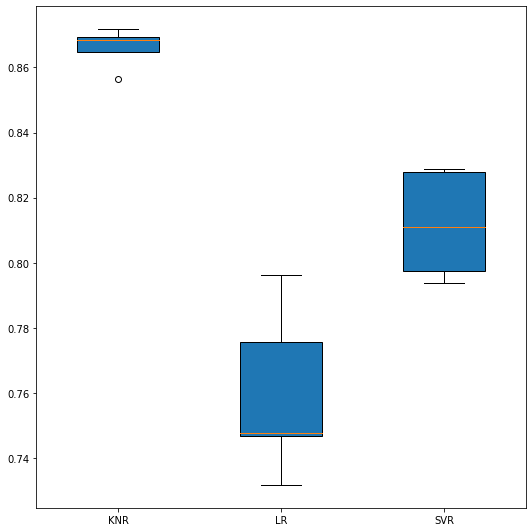

In [80]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

box_plot_data=[box_KNR,box_LR,box_SVR]
plt.boxplot(box_plot_data,patch_artist=True,labels=['KNR','LR','SVR'],widths=(0.5, 0.5, 0.5))
plt.show()

In KNR, Boxplot represents the accuracy rate which shows that most of the validation scores are spread between 0.86 - 0.87 with most of the values falling in the lower end of IQR. It also shows that a minimum value is outlier with value near to 0.85 and maximum value near 0.87.

In  Linear regression, Boxplot represents the accuracy rate which shows that most of the validation scores lies in the range of 0.73 - 0.79 with most of the value lying in upper IQR . It also says that the minimum value is around 0.73 and the maximum value is around 0.79.

In Support Vector Regression, Box plot represents the accuracy rate which shows that most of the validation scores lies in between 0.79 - 0.82 with values equally divided in both IQR. It also shows that the maximum value is around 0.82 and minimum value around 0.79.


### KNR Model Accuracy with varying parameters

In [81]:
acc_score = []
k_values = []

for k in range(1,26,2):

    KNN = KNeighbourRegressor(k)
    _,best_out = kfold(X_train,y_train,KNN)
    acc_score.append(best_out)
    k_values.append(k)

In [82]:
print(acc_score)
print(k_values)

[0.8973811005282728, 0.8827088330394265, 0.8717098938976173, 0.871060559241315, 0.863597209832401, 0.8564469625719975, 0.8577805083989863, 0.8499084960915149, 0.8457943910351675, 0.8434014635495226, 0.839723493594775, 0.8353156198124979, 0.829701066052996]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


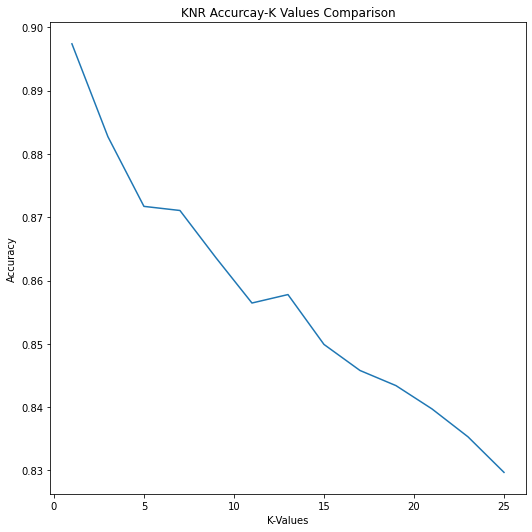

In [83]:
plt.plot(k_values,acc_score)

plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('KNR Accurcay-K Values Comparison')
plt.show()

#### From the graph, we can infer that as the K-value increases, the accuracy decreases.